In [1]:
import pandas as pd
import numpy as np
import os, glob, sys
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua4 as eua
import trajectory
import h5py

import multiprocessing
from functools import partial

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def datetime_to_seconds(dates, ref='1900-01-01T00:00:00'):
    """ from datetime64 to seconds since 1900-01-01 00:00:00"""
    return ((dates - np.datetime64(ref)) / np.timedelta64(1, 's')).astype(np.int64)

def seconds_to_datetime(seconds, ref='1900-01-01'):
    """ from seconds to datetime64 """
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit='s', origin=ref)


In [3]:
# fl = glob.glob('/mnt/users/staff/a1400070/scratch/converted_v8/*11035*')[0]
# # df = eua.CDMDataset(fl).to_dataframe(groups=['observations_table', 'advanced_homogenisation'], variables=['report_id','observation_value', 'observed_variable', 'z_coordinate', 'data_policy_licence', 'date_time','latitude_displacement', 'longitude_displacement', 'time_since_launch', 'true_time'])

In [4]:
# df = df[df.observed_variable == 126]
# df.loc[(df.date_time.dt.year >= 1980) & (df.date_time.dt.year <= 1989)]

In [2]:
statid = '11120'
# statid = '11035'
request = {
            'variable': ['air_temperature', 'u_component_of_wind' ,'v_component_of_wind', 'relative_humidity',
                         'specific_humidity',
                         'dew_point_temperature',
                         'geopotential',
#                          'wind_speed'
#                          'dew_point_depression',
                        ], 
            'statid': statid,
            'optional': 'RAOBCORE_bias_estimate',
            'date': '19800101-19891231',
            'format': 'csv',
}
df = eua.vm_request_wrapper(request, overwrite=True, vm_url='http://127.0.0.1:8007')
# display(df)
first = True
for i in ['air_temperature', 'eastward_wind_speed', 'northward_wind_speed']:
    if first:
        out_df = df[df.variable == i]
        out_df = out_df.rename(columns={"observation_value": i})
        out_df = out_df.drop(['variable'], axis=1)
        print(i, len(out_df))
        first = False
    else:
        new = df[df.variable == i]
        print(i, len(new))
        new = new.drop(["RAOBCORE_bias_estimate", "latitude", "longitude", "data_policy_licence", "primary_id", "report_id", "variable"], axis=1).rename(columns={'observation_value':i})
        out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='inner')
for i in ['air_dewpoint', 'geopotential_height', 'relative_humidity', 'specific_humidity']:
    new = df[df.variable == i]
    print(i, len(new))
    new = new.drop(["RAOBCORE_bias_estimate", "latitude", "longitude", "data_policy_licence", "primary_id", "report_id", "variable"], axis=1).rename(columns={'observation_value':i})
    out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='left')
out_df
# first = True
# for j in df:
#     if first:
#         dfj = df[j].to_dataframe()
#         first = False
#     else:
#         dfj = pd.merge(dfj, df[j].to_dataframe().drop(["station_id", "lat", "lon", "trajectory_label", "report_id", "obs", "data_policy_licence"], axis=1), how="inner", on=["plev", "time", ]) 
# dfj

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8007): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f1d46a6f820>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [ ]:
# df.drop(["station_id", "lat", "lon", "trajectory_label", "report_id", "obs", "data_policy_licence"], axis=1)
rh = rh.drop(["RAOBCORE_bias_estimate", "latitude", "longitude", "data_policy_licence", "primary_id", "report_id", "variable"], axis=1).rename(columns={'observation_value':'rh'})

In [43]:
rh = df[df.variable == 'relative_humidity']
ta = df[df.variable == 'air_temperature']
rh = rh.drop(["RAOBCORE_bias_estimate", "latitude", "longitude", "data_policy_licence", "primary_id", "report_id", "variable"], axis=1).rename(columns={'observation_value':'rh'})

In [44]:
pd.merge(rh, ta, on=['date_time', 'z_coordinate'], how='inner')

,date_time,z_coordinate,rh,RAOBCORE_bias_estimate,data_policy_licence,latitude,longitude,primary_id,report_id,variable,observation_value
0,1980-06-07 12:00:00+00,40000.0,0.038816,-0.536108,4,47.200001,15.47,0-20000-0-11240,10000000000,air_temperature,245.100006
1,1980-06-07 12:00:00+00,49000.0,0.054865,NaN,4,47.200001,15.47,0-20000-0-11240,10000000000,air_temperature,256.500000
2,1980-06-07 12:00:00+00,50000.0,0.455699,-0.539096,4,47.200001,15.47,0-20000-0-11240,10000000000,air_temperature,256.500000
3,1980-06-07 12:00:00+00,55400.0,0.064735,NaN,4,47.200001,15.47,0-20000-0-11240,10000000000,air_temperature,262.700012
4,1980-06-07 12:00:00+00,60000.0,0.676300,NaN,4,47.200001,15.47,0-20000-0-11240,10000000000,air_temperature,266.899994
...,...,...,...,...,...,...,...,...,...,...,...
28474,1989-12-31 06:00:00+00,84000.0,0.891205,NaN,4,47.000000,15.43,0-20000-0-11240,10000001331,air_temperature,267.299988
28475,1989-12-31 06:00:00+00,85000.0,0.891555,-0.000000,4,47.000000,15.43,0-20000-0-11240,10000001331,air_temperature,267.700012
28476,1989-12-31 06:00:00+00,92500.0,0.920053,-0.000000,4,47.000000,15.43,0-20000-0-11240,10000001331,air_temperature,268.700012
28477,1989-12-31 06:00:00+00,93500.0,0.941369,NaN,4,47.000000,15.43,0-20000-0-11240,10000001331,air_temperature,268.899994


32273


<AxesSubplot:xlabel='date_time', ylabel='observation_value'>

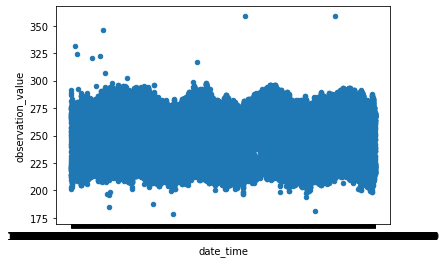

In [71]:
print(len(df[df.variable == 'air_temperature']))
df[df.variable == 'air_temperature'].plot.scatter(x='date_time', y='observation_value')

917


<AxesSubplot:xlabel='date_time', ylabel='observation_value'>

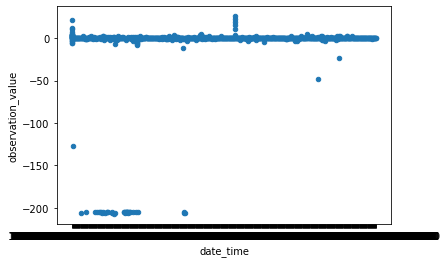

In [73]:
print(len(df[df.variable == 'eastward_wind_speed']))
df[df.variable == 'eastward_wind_speed'].plot.scatter(x='date_time', y='observation_value')

In [74]:
# fs = glob.glob("./displacement_files_no_licence/*")
# good = 0
# bad = 0
# for i in fs:
#     print(i)
#     da = pd.read_csv(i)
#     print(len(da[da.data_policy_licence != 4]))
#     if len(da[da.data_policy_licence != 4]) == 0:
#         bad +=1
#     else:
#         good +=1

In [5]:
good

26

In [6]:
bad

55

In [24]:
def create_disp_files(s):
    try:
        statid = (s.split("-")[-1])
        print(statid)
        conv_file = glob.glob('/mnt/users/scratch/leo/scratch/converted_v9/newindex/*'+statid+'*')[0]
        dt_from = datetime_to_seconds(np.datetime64('2010-01-01'))
        dt_to = datetime_to_seconds(np.datetime64('2019-12-31'))

        df_dict = {}
        h_df_dict = {}

        with h5py.File(conv_file, 'r') as file:
            rts = file['recordindices']['recordtimestamp'][:]
            idx = np.where(np.logical_and((rts >= dt_from), (rts <= dt_to)))[0]
            plevs = [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]
            idx_d = {}
            var_d = {'air_temperature':'126', 'relative_humidity':'138', 'geopotential':'117', 'eastward_wind_speed':'139', 'northward_wind_speed':'140', 'dew_point': '137', 'specific_humidity':'39'}
            for i in var_d:
                idx_d[i] = file['recordindices'][var_d[i]][idx]

            masks = {}
            for i in idx_d:
                masks[i] = file['observations_table']['z_coordinate'][idx_d[i][0]:idx_d[i][-1]]
                masks[i] = np.isin(masks[i],plevs)

            mask = masks['air_temperature']
            t_idx = idx_d['air_temperature']
            df_dict['z_coordinate'] = list(file['observations_table']['z_coordinate'][t_idx[0]:t_idx[-1]][mask])
            df_dict['date_time'] = seconds_to_datetime(list(file['observations_table']['date_time'][t_idx[0]:t_idx[-1]][mask]))
            df_dict['latitude'] = list(file['observations_table']['latitude'][t_idx[0]:t_idx[-1]][mask])
            df_dict['longitude'] = list(file['observations_table']['longitude'][t_idx[0]:t_idx[-1]][mask])
            repid = np.asarray(file['observations_table']['report_id'][t_idx[0]:t_idx[-1]][mask])
            df_dict['report_id'] = list(repid.view('|S{}'.format(repid.shape[1])).flatten().astype(str))
            df_dict['RASE_bias_estimate'] = list(file['advanced_homogenisation']['RASE_bias_estimate'][t_idx[0]:t_idx[-1]][mask])
            # df_dict['latitude_displacement'] = list(file['advanced_homogenisation']['latitude_displacement'][t_idx[0]:t_idx[-1]][mask])
            # df_dict['longitude_displacement'] = list(file['advanced_homogenisation']['longitude_displacement'][t_idx[0]:t_idx[-1]][mask])
            # df_dict['time_since_launch'] = list(file['advanced_homogenisation']['time_since_launch'][t_idx[0]:t_idx[-1]][mask])
            df_dict['air_temperature'] = list(file['observations_table']['observation_value'][t_idx[0]:t_idx[-1]][mask])

            df_dict_d = {}
            for i in masks:
                if i != 'air_temperature':
                    df_dict_d[i] = {}
            for i in masks:
                if i != 'air_temperature':
                    df_dict_d[i]['z_coordinate'] = list(file['observations_table']['z_coordinate'][idx_d[i][0]:idx_d[i][-1]][masks[i]])
                    df_dict_d[i]['date_time'] = seconds_to_datetime(list(file['observations_table']['date_time'][idx_d[i][0]:idx_d[i][-1]][masks[i]]))
                    df_dict_d[i][i] = list(file['observations_table']['observation_value'][idx_d[i][0]:idx_d[i][-1]][masks[i]])            

            first = True
            for i in ['air_temperature', 'eastward_wind_speed', 'northward_wind_speed']:
                if first:
                    out_df = pd.DataFrame.from_dict(df_dict)
                    # print('out_df')
                    # display(out_df)
                    # out_df = out_df.rename(columns={"observation_value": i})
                    # out_df = out_df.drop(['variable'], axis=1)
                    first = False
                else:
                    new = pd.DataFrame.from_dict(df_dict_d[i])
                    for drp in ["data_policy_licence", "RAOBCORE_bias_estimate", "latitude", "longitude", "primary_id", "report_id", "variable"]:
                        try:
                            new = new.drop([drp], axis=1)
                        except: pass
                    # new = new.rename(columns={'observation_value':i})
                    out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='inner')
            for i in ['dew_point', 'geopotential', 'relative_humidity', 'specific_humidity']:
                new = pd.DataFrame.from_dict(df_dict_d[i])
                print(i, len(new))
                for drp in ["data_policy_licence", "RAOBCORE_bias_estimate", "latitude", "longitude", "primary_id", "report_id", "variable"]:
                    try:
                        new = new.drop([drp], axis=1)
                    except: pass
                new = new.rename(columns={'observation_value':i})
                out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='left')

            dfj = out_df    
            # print('dfj')
            # display(dfj)

            latds = []
            londs = []
            rtss = []
            for i in dfj.report_id.unique():
                dfi = dfj[dfj.report_id == i]
                dfi = dfi.sort_values(by=['z_coordinate'], ascending=False)
                latd, lond, us, vs, rts = trajectory.trajectory(lat = dfi.latitude.iloc[0], lon = dfi.longitude.iloc[0], u = np.array(dfi.eastward_wind_speed), v = np.array(dfi.northward_wind_speed), pressure= np.array(dfi.z_coordinate), temperature=np.array(dfi.air_temperature))
                latds += (latd[::-1])
                londs += (lond[::-1])
                rtss += (rts[::-1])
            dfj['latitude_displacement'] = latds
            dfj['longitude_displacement'] = londs
            dfj['seconds_since_launche'] = rtss
            if len(dfj) > 0:
                dfj.to_csv("./displacement_files_no_licience_2010/"+str(statid)+"_displacements_2010_2020.csv")

    except:
        pass

In [25]:
stats = list(pd.read_csv(glob.glob('RAOBS_EUR-11.csv')[0]).statid)
pool = multiprocessing.Pool(processes=10)
result_list = list(map(create_disp_files, stats))

02185
dew_point 40368
geopotential 42896
relative_humidity 40366
specific_humidity 40366
02365
02591
dew_point 88331
geopotential 93371
relative_humidity 88325
specific_humidity 88325
02836
dew_point 102157
geopotential 111209
relative_humidity 102139
specific_humidity 102139
02935
dew_point 65562
geopotential 71509
relative_humidity 65586
specific_humidity 65559
02963
dew_point 123436
geopotential 132475
relative_humidity 123430
specific_humidity 123430
03171
03238
dew_point 59233
geopotential 62850
relative_humidity 59226
specific_humidity 59226
03316
03743
dew_point 49957
geopotential 64577
relative_humidity 49950
specific_humidity 49950
03769
06181
06458
dew_point 58200
geopotential 75340
relative_humidity 58531
specific_humidity 57935
07145
dew_point 68919
geopotential 107100
relative_humidity 68906
specific_humidity 68900
07481
dew_point 1750
geopotential 2933
relative_humidity 1748
specific_humidity 1748
07510
dew_point 80203
geopotential 100814
relative_humidity 80191
specific_

In [22]:
create_disp_files(stats[0])

02185
out_df


,z_coordinate,date_time,latitude,longitude,report_id,RASE_bias_estimate,air_temperature
0,5000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.275892,196.100006
1,7000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.246796,198.699997
2,10000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.095251,202.899994
3,15000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,-0.016289,207.500000
4,20000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,-0.149590,207.899994
...,...,...,...,...,...,...,...
40538,50000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.067985,249.330002
40539,70000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,0.014502,262.160004
40540,85000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.000000,269.339996
40541,92500.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.000000,272.829987


dew_point 40368
geopotential 42896
relative_humidity 40366
specific_humidity 40366
dfj


,z_coordinate,date_time,latitude,longitude,report_id,RASE_bias_estimate,air_temperature,eastward_wind_speed,northward_wind_speed,dew_point,geopotential,relative_humidity,specific_humidity
0,5000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.275892,196.100006,5.785089,-6.894400,180.100006,190350.000000,0.061831,1.255134e-06
1,7000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.246796,198.699997,2.958328,-6.344154,180.699997,171220.000000,0.046425,1.005987e-06
2,10000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,0.095251,202.899994,-6.553216,-4.588612,181.899994,150730.000000,0.031259,8.841948e-07
3,15000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,-0.016289,207.500000,-9.961947,-0.871557,184.500000,126900.000000,0.026442,9.534635e-07
4,20000.0,2010-01-01 00:00:00,65.550003,22.129999,10000030241,-0.149590,207.899994,-23.908672,2.091738,196.899994,109640.000000,0.201297,5.750418e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40424,50000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.067985,249.330002,19.443613,29.940538,247.600006,52651.902344,0.855569,9.535231e-04
40425,70000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,0.014502,262.160004,5.821447,10.948550,261.420013,27958.759766,0.942516,2.219059e-03
40426,85000.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.000000,269.339996,-2.236948,3.194693,269.059998,13111.491211,0.979197,3.310204e-03
40427,92500.0,2019-11-13 23:30:06,65.543312,22.114531,10000033453,-0.000000,272.829987,-3.396035,0.846727,272.500000,6521.422363,0.976220,3.926313e-03


NameError: name 'df' is not defined

In [20]:
%debug

> /tmp/ipykernel_799464/316548859.py(68)create_disp_files()
     66                 out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='inner')
     67         for i in ['dew_point', 'geopotential', 'relative_humidity', 'specific_humidity']:
---> 68             new = pd.DataFrame.from_dict(df_dict_d[i])
     69             print(i, len(new))
     70             for drp in ["data_policy_licence", "RAOBCORE_bias_estimate", "latitude", "longitude", "primary_id", "report_id", "variable"]:



ipdb>  df_dict_d.keys


<built-in method keys of dict object at 0x7f09cdc177c0>


ipdb>  df_dict_d.keys()


dict_keys(['relative_humidty', 'geopotential', 'eastward_wind_speed', 'northward_wind_speed', 'dew_point', 'specific_humidity'])


ipdb>  exit


In [7]:
# def create_disp_files(s):
#     statid = (s.split("-")[-1])
#     try:
#         #         request = {
#         #                     'variable': ['air_temperature' ,'u_component_of_wind' ,'v_component_of_wind'],
#         #                     'statid': statid,
#         #                     'optional': 'RAOBCORE_bias_estimate',
#         #                     'date': '19800101-19891231',
#         #         }
#         #         df = eua.vm_request_wrapper(request, overwrite=True, vm_url='http://127.0.0.1:8007')

#         #         first = True
#         #         for j in df:
#         #             if first:
#         #                 dfj = df[j].to_dataframe()
#         #                 first = False
#         #             else:
#         #                 dfj = pd.merge(dfj, df[j].to_dataframe().drop(["station_id", "lat", "lon", "trajectory_label", "report_id", "obs", "data_policy_licence"], axis=1), how="inner", on=["plev", "time", ]) 



#         request = {
#                     'variable': ['air_temperature', 'u_component_of_wind' ,'v_component_of_wind', 'relative_humidity',
#                                  'specific_humidity',
#                                  'dew_point_temperature',
#                                  'geopotential',
#         #                          'wind_speed'
#         #                          'dew_point_depression',
#                                 ], 
#                     'statid': statid,
#                     'pressure_level': [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000],
#                     'optional': 'RAOBCORE_bias_estimate',
#                     'date': '20100101-20191231',
#                     'format': 'csv',
#         }
#         print(request)
#         df = eua.vm_request_wrapper(request, overwrite=True, vm_url='http://127.0.0.1:8007')
#         display(df)
#         first = True
#         for i in ['air_temperature', 'eastward_wind_speed', 'northward_wind_speed']:
#             if first:
#                 out_df = df[df.variable == i]
#                 out_df = out_df.rename(columns={"observation_value": i})
#                 out_df = out_df.drop(['variable'], axis=1)
#     #                 print(i, len(out_df))
#                 first = False
#             else:
#                 new = df[df.variable == i]
#     #                 print(i, len(new))
#                 for drp in ["data_policy_licence", "RAOBCORE_bias_estimate", "latitude", "longitude", "primary_id", "report_id", "variable"]:
#                     try:
#                         new = new.drop([drp], axis=1)
#                     except: pass
#                 new = new.rename(columns={'observation_value':i})
#                 out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='inner')
#         for i in ['air_dewpoint', 'geopotential_height', 'relative_humidity', 'specific_humidity']:
#             new = df[df.variable == i]
#             print(i, len(new))
#             for drp in ["data_policy_licence", "RAOBCORE_bias_estimate", "latitude", "longitude", "primary_id", "report_id", "variable"]:
#                 try:
#                     new = new.drop([drp], axis=1)
#                 except: pass
#             new = new.rename(columns={'observation_value':i})
#             out_df = pd.merge(out_df, new, on=['date_time', 'z_coordinate'], how='left')
#         dfj = out_df        

#         # CORE_bias_estimate 	data_policy_licence 	date_time 	latitude 	longitude 	primary_id 	report_id 	z_coordinate 	air_temperature 	eastward_wind_speed 	northward_wind_speed 	air_dewpoint 	geopotential_height 	relative_humidity 	specific_humidity

#         latds = []
#         londs = []
#         rtss = []
#         for i in dfj.report_id.unique():
#             dfi = dfj[dfj.report_id == i]
#             dfi = dfi.sort_values(by=['z_coordinate'], ascending=False)
#             latd, lond, us, vs, rts = trajectory.trajectory(lat = dfi.latitude.iloc[0], lon = dfi.longitude.iloc[0], u = np.array(dfi.eastward_wind_speed), v = np.array(dfi.northward_wind_speed), pressure= np.array(dfi.z_coordinate), temperature=np.array(dfi.air_temperature))
#             latds += (latd[::-1])
#             londs += (lond[::-1])
#             rtss += (rts[::-1])
#         dfj['latitude_displacement'] = latds
#         dfj['longitude_displacement'] = londs
#         dfj['seconds_since_launche'] = rtss
#         if len(dfj) > 0:
#             dfj.to_csv("./displacement_files_no_licience_2010/"+str(statid)+"_displacements_2010_2020.csv")
#     #     dfj = dfj.drop(['ua', 'va', 'ta'], axis=1)
#     #     dfj.to_csv("./displacement_files_no_licence_no_obs/"+str(statid)+"_displacements_1980_1990.csv")
#         return 0
#     except:
#         return 1

In [3]:
stats = list(pd.read_csv(glob.glob('RAOBS_EUR-11.csv')[0]).statid)
pool = multiprocessing.Pool(processes=10)
result_list = list(map(create_disp_files, stats))


{'variable': ['air_temperature', 'u_component_of_wind', 'v_component_of_wind', 'relative_humidity', 'specific_humidity', 'dew_point_temperature', 'geopotential'], 'statid': '02185', 'pressure_level': [1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 70000, 85000, 92500, 100000], 'optional': 'RAOBCORE_bias_estimate', 'date': '20100101-20191231', 'format': 'csv'}
{'variable': ['air_temperature', 'u_component_of_wind', 'v_component_of_wind', 'relative_humidity', 'specific_humidity', 'dew_point_temperature', 'geopotential'], 'statid': '02365', 'pressure_level': [1000, 2000, 3000, 5000, 7000, 10000, 15000, 20000, 25000, 30000, 40000, 50000, 70000, 85000, 92500, 100000], 'optional': 'RAOBCORE_bias_estimate', 'date': '20100101-20191231', 'format': 'csv'}
{'variable': ['air_temperature', 'u_component_of_wind', 'v_component_of_wind', 'relative_humidity', 'specific_humidity', 'dew_point_temperature', 'geopotential'], 'statid': '02591', 'pressure_level': [1000, 2000,

In [8]:
create_disp_files(stats[0])

02185
df_dict


{'z_coordinate': [5000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  5000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  5000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  5000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  5000.0,
  7000.0,
  10000.0,
  15000.0,
  20000.0,
  25000.0,
  30000.0,
  40000.0,
  50000.0,
  70000.0,
  85000.0,
  92500.0,
  100000.0,
  5000.0,
  7000.0,
  

In [53]:
stats

['0-20000-0-02185',
 '0-20000-0-02365',
 '0-20000-0-02591',
 '0-20000-0-02836',
 '0-20000-0-02935',
 '0-20000-0-02963',
 '0-20000-0-03171',
 '0-20000-0-03238',
 '0-20000-0-03316',
 '0-20000-0-03743',
 '0-20000-0-03769',
 '0-20000-0-06181',
 '0-20000-0-06458',
 '0-20000-0-07145',
 '0-20000-0-07481',
 '0-20000-0-07510',
 '0-20000-0-07761',
 '0-20000-0-08001',
 '0-20000-0-08023',
 '0-20000-0-08190',
 '0-20000-0-08430',
 '0-20000-0-10046',
 '0-20000-0-10184',
 '0-20000-0-10200',
 '0-20000-0-10238',
 '0-20000-0-10304',
 '0-20000-0-10339',
 '0-20000-0-10439',
 '0-20000-0-10771',
 '0-20000-0-10818',
 '0-20000-0-11120',
 '0-20000-0-11240',
 '0-20000-0-12120',
 '0-20000-0-12374',
 '0-20000-0-12425',
 '0-20000-0-14240',
 '0-20000-0-15480',
 '0-20000-0-16113',
 '0-20000-0-16622',
 '0-20000-0-16716',
 '0-20000-0-16754',
 '0-20000-0-17095',
 '0-20000-0-22113',
 '0-20000-0-22217',
 '0-20000-0-22271',
 '0-20000-0-22543',
 '0-20000-0-22820',
 '0-20000-0-22845',
 '0-20000-0-23205',
 '0-20000-0-23415',


In [6]:
dfj

,RAOBCORE_bias_estimate,data_policy_licence,lat,lon,obs,plev,report_id,station_id,ta,time,trajectory_label,ua,va,latitude_displacement,longitude_displacement,seconds_since_launche
0,NaN,0,48.25,16.370001,0,3300.0,10000001424,WIEN/HOHE WARTE (11035-1),205.699997,1980-01-01 00:00:00,10000001424,2.757462e+01,-4.862149,0.003091,0.764590,4425.726411
1,-0.609962,0,48.25,16.370001,0,5000.0,10000001424,WIEN/HOHE WARTE (11035-1),206.899994,1980-01-01 00:00:00,10000001424,2.161293e+01,-7.866463,0.031694,0.598008,3923.898202
2,NaN,0,48.25,16.370001,0,5800.0,10000001424,WIEN/HOHE WARTE (11035-1),206.300003,1980-01-01 00:00:00,10000001424,1.772654e+01,-3.125667,0.040557,0.550358,3744.385991
3,-0.578662,0,48.25,16.370001,0,7000.0,10000001424,WIEN/HOHE WARTE (11035-1),210.100006,1980-01-01 00:00:00,10000001424,1.772654e+01,-3.125667,0.046986,0.495535,3515.184330
4,-0.474451,0,48.25,16.370001,0,10000.0,10000001424,WIEN/HOHE WARTE (11035-1),212.500000,1980-01-01 00:00:00,10000001424,1.674173e+01,-2.952019,0.058998,0.392960,3073.983019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126273,NaN,0,48.25,16.370001,0,58100.0,10000015998,WIEN/HOHE WARTE (11035-1),258.100006,1989-12-31 12:00:00,10000015998,1.710101e+00,4.698463,0.059028,-0.007276,849.913360
126274,0.385953,0,48.25,16.370001,0,70000.0,10000015998,WIEN/HOHE WARTE (11035-1),266.899994,1989-12-31 12:00:00,10000015998,-8.600000e-16,7.000000,0.043967,-0.010579,563.600440
126275,0.026588,0,48.25,16.370001,0,85000.0,10000015998,WIEN/HOHE WARTE (11035-1),271.899994,1989-12-31 12:00:00,10000015998,-8.715574e-01,9.961947,0.020612,-0.008778,257.399527
126276,-0.000000,0,48.25,16.370001,0,92500.0,10000015998,WIEN/HOHE WARTE (11035-1),268.899994,1989-12-31 12:00:00,10000015998,-4.104242e+00,11.276312,0.007829,-0.004281,123.547387


In [7]:
dfj[:20]

,RAOBCORE_bias_estimate,data_policy_licence,lat,lon,obs,plev,report_id,station_id,ta,time,trajectory_label,ua,va,latitude_displacement,longitude_displacement,seconds_since_launche
0,NaN,0,48.25,16.370001,0,3300.0,10000001424,WIEN/HOHE WARTE (11035-1),205.699997,1980-01-01 00:00:00,10000001424,27.574617,-4.862149e+00,0.003091,0.764590,4425.726411
1,-0.609962,0,48.25,16.370001,0,5000.0,10000001424,WIEN/HOHE WARTE (11035-1),206.899994,1980-01-01 00:00:00,10000001424,21.612930,-7.866463e+00,0.031694,0.598008,3923.898202
2,NaN,0,48.25,16.370001,0,5800.0,10000001424,WIEN/HOHE WARTE (11035-1),206.300003,1980-01-01 00:00:00,10000001424,17.726540,-3.125667e+00,0.040557,0.550358,3744.385991
3,-0.578662,0,48.25,16.370001,0,7000.0,10000001424,WIEN/HOHE WARTE (11035-1),210.100006,1980-01-01 00:00:00,10000001424,17.726540,-3.125667e+00,0.046986,0.495535,3515.184330
4,-0.474451,0,48.25,16.370001,0,10000.0,10000001424,WIEN/HOHE WARTE (11035-1),212.500000,1980-01-01 00:00:00,10000001424,16.741732,-2.952019e+00,0.058998,0.392960,3073.983019
5,-0.512076,0,48.25,16.370001,0,15000.0,10000001424,WIEN/HOHE WARTE (11035-1),216.500000,1980-01-01 00:00:00,10000001424,13.522962,-3.623467e+00,0.074005,0.289056,2564.845348
6,-0.339300,0,48.25,16.370001,0,20000.0,10000001424,WIEN/HOHE WARTE (11035-1),217.300003,1980-01-01 00:00:00,10000001424,13.787309,-2.431074e+00,0.083931,0.221798,2199.551102
7,NaN,0,48.25,16.370001,0,24000.0,10000001424,WIEN/HOHE WARTE (11035-1),208.300003,1980-01-01 00:00:00,10000001424,15.320889,1.285575e+01,0.073277,0.177222,1972.451190
8,-0.496276,0,48.25,16.370001,0,25000.0,10000001424,WIEN/HOHE WARTE (11035-1),210.300003,1980-01-01 00:00:00,10000001424,14.784115,1.761902e+01,0.066422,0.167067,1922.432558
9,-0.601711,0,48.25,16.370001,0,30000.0,10000001424,WIEN/HOHE WARTE (11035-1),216.100006,1980-01-01 00:00:00,10000001424,5.904038,3.348346e+01,0.014130,0.135286,1694.886656
